## Exploratory data analysis

Dataset: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

In [2]:
# load the data
df = pd.read_csv('houses_to_rent_v2.csv')
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
# check data types
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [4]:
# rename the columns
df = df.rename(columns = {'city': 'city', 'area': 'area', 'rooms': 'rooms','bathroom': 'bathroom',
                          'parking spaces': 'parking_spaces', 'floor': 'floor', 'animal': 'animal',
                          'furniture': 'furniture', 'hoa (R$)': 'hoa', 'rent amount (R$)': 'rent_amount',
                          'property tax (R$)': 'property_tax', 'fire insurance (R$)': 'fire_insurance',
                          'total (R$)': 'total'})
df.head(5)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
# shape of data frame
df.shape

(10692, 13)

In [6]:
# remove duplicates
df = df.drop_duplicates()
df.shape

(10334, 13)

In [7]:
# checking for missing values
print(df.isnull().sum())

city              0
area              0
rooms             0
bathroom          0
parking_spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent_amount       0
property_tax      0
fire_insurance    0
total             0
dtype: int64


In [8]:
# describe rent amount
df['rent_amount'].describe()

count    10334.000000
mean      3966.296013
std       3436.190007
min        450.000000
25%       1598.250000
50%       2750.000000
75%       5000.000000
max      45000.000000
Name: rent_amount, dtype: float64

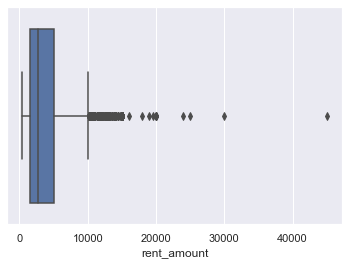

In [9]:
# box plot
sns.boxplot(x=df['rent_amount'])

In [10]:
# cities in the dataset
df['city'].value_counts()

São Paulo         5717
Rio de Janeiro    1431
Belo Horizonte    1209
Porto Alegre      1154
Campinas           823
Name: city, dtype: int64

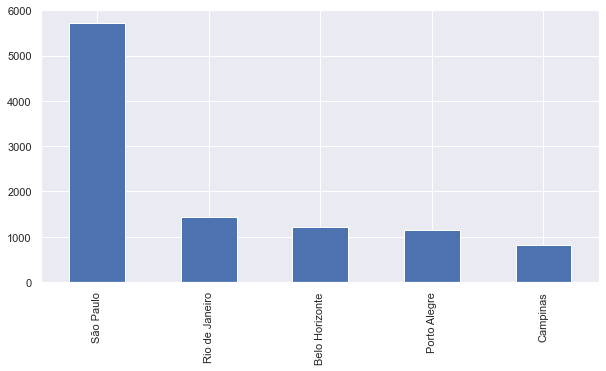

In [11]:
df['city'].value_counts().plot(kind='bar', figsize=(10,5))

In [12]:
# describing rent amount by city
df[['city','rent_amount']].groupby('city').describe()

rent_amount                                                   \
                     count         mean          std    min     25%     50%   
city                                                                          
Belo Horizonte      1209.0  3742.294458  3522.505187  450.0  1300.0  2400.0   
Campinas             823.0  2392.897934  2342.185631  500.0  1000.0  1500.0   
Porto Alegre        1154.0  2349.467938  2231.002720  500.0  1100.0  1620.0   
Rio de Janeiro      1431.0  3327.011181  2834.847586  500.0  1500.0  2400.0   
São Paulo           5717.0  4726.548015  3652.907282  500.0  2000.0  3500.0   

                                 
                   75%      max  
city                             
Belo Horizonte  4750.0  15000.0  
Campinas        2800.0  15000.0  
Porto Alegre    2600.0  19000.0  
Rio de Janeiro  4000.0  15000.0  
São Paulo       6300.0  45000.0

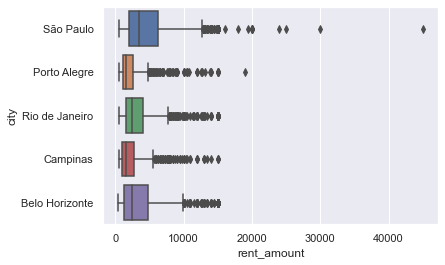

In [13]:
# boxplot by city
sns.boxplot(x=df['rent_amount'], y=df['city'])

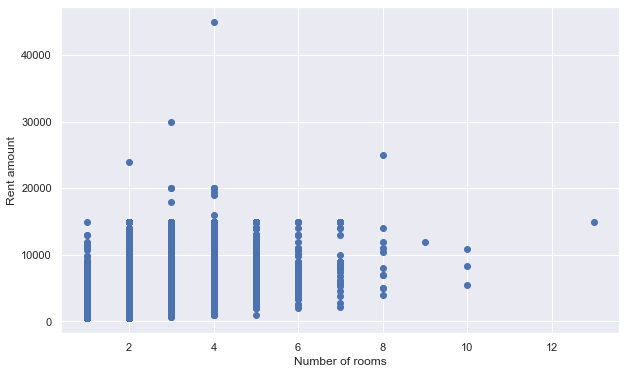

In [14]:
# rent amount by number of rooms
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['rooms'], df['rent_amount'])
ax.set_xlabel('Number of rooms')
ax.set_ylabel('Rent amount')
plt.show()

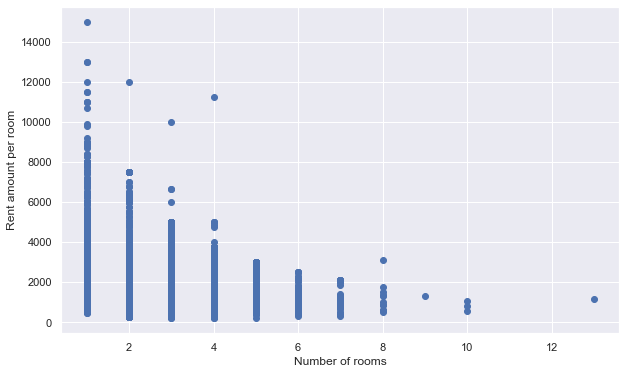

In [15]:
# rent amount per room
df['rent_per_room'] = df['rent_amount']/df['rooms']

fig, ar=plt.subplots(figsize=(10,6))
ar.scatter(df['rooms'], df['rent_per_room'])
ar.set_xlabel('Number of rooms')
ar.set_ylabel('Rent amount per room')
plt.show()

In [16]:
# mean rent amount by city and furniture
df[['city', 'furniture', 'rent_amount']].groupby(['city','furniture']).mean()

rent_amount
city           furniture                 
Belo Horizonte furnished      5032.426829
               not furnished  3539.823923
Campinas       furnished      2889.648649
               not furnished  2315.455056
Porto Alegre   furnished      3094.207483
               not furnished  2094.870930
Rio de Janeiro furnished      4246.846154
               not furnished  2966.414397
São Paulo      furnished      5672.192482
               not furnished  4376.972209

In [17]:
# number of furnished by city
df[['city','furniture','rent_amount']].groupby(['city','furniture']).count()

rent_amount
city           furniture                 
Belo Horizonte furnished              164
               not furnished         1045
Campinas       furnished              111
               not furnished          712
Porto Alegre   furnished              294
               not furnished          860
Rio de Janeiro furnished              403
               not furnished         1028
São Paulo      furnished             1543
               not furnished         4174

In [18]:
# mean rent amount by city and animal
df[['city','animal','rent_amount']].groupby(['city','animal']).mean()

rent_amount
city           animal                
Belo Horizonte acept      3939.748889
               not acept  3167.184466
Campinas       acept      2497.858859
               not acept  1947.649682
Porto Alegre   acept      2357.127401
               not acept  2303.557576
Rio de Janeiro acept      3360.396161
               not acept  3192.768421
São Paulo      acept      4934.347200
               not acept  4049.110283